# Exploratory Data Analysis (EDA) Project: Telco Customer Churn

## Introduction

This project is part of the IBM Machine Learning Specialization course on Exploratory Data Analysis (EDA). The goal is to apply foundational data analysis techniques to gain actionable insights, clean and prepare data for modeling, and formulate and test hypotheses using real-world data.

In this project, I explore the [**Telco Customer Churn Dataset**](https://www.kaggle.com/datasets/blastchar/telco-customer-churn), which contains customer data for a telecom company. Each record includes customer demographics, service subscription details, billing information, and whether the customer has churned (i.e., left the company).

Churn is a critical metric in the telecom industry, as retaining customers is often more cost-effective than acquiring new ones. Through this project, I aim to identify patterns, key features, and trends that distinguish churned customers from retained ones, and lay the groundwork for a predictive model in future steps.

This notebook includes:
- A summary of the dataset and its structure
- A clearly defined exploration plan
- Step-by-step data cleaning and preprocessing
- Rich exploratory data analysis with visualizations
- Feature engineering and transformation
- Hypothesis formation and statistical testing
- Actionable insights and key takeaways

By the end of this project, I will produce a clean dataset that is ready for supervised machine learning and demonstrate a complete analytical workflow suitable for real-world business environments.

## Step 1: Importing Required Libraries

In this step, we import all the Python libraries needed for this project. These libraries provide essential tools for data manipulation, visualization, and statistical analysis.

- **pandas**: For loading and manipulating structured data.
- **numpy**: For numerical operations and handling arrays.
- **matplotlib** and **seaborn**: For data visualization.
- **scipy.stats**: For statistical tests and hypothesis testing.
- **warnings**: To suppress unnecessary warning messages for cleaner output.

These foundational tools will help us clean the data, explore patterns, generate visualizations, and perform hypothesis testing as required in this project.


In [1]:
# Import core libraries for data manipulation
import pandas as pd  # For working with structured data (DataFrames)
import numpy as np  # For numerical operations and arrays
from math import sqrt

# Import visualization libraries
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For advanced and aesthetically pleasing statistical plots

# Import statistical functions for hypothesis testing
from scipy import stats  # Provides a wide range of statistical tools and tests

# Ignore warnings to keep notebook output clean
import warnings

warnings.filterwarnings('ignore')

# Configure some default styles for plots
sns.set(style='whitegrid')  # Apply a clean theme for seaborn plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size

## Step 2: Loading and Summarizing the Data
In this step, we will load the dataset into a Pandas DataFrame and perform an initial inspection to understand its structure, size, and content.

This involves:

- Displaying the first few rows to get a sense of the data.
- Checking the shape of the dataset to understand the number of rows and columns.
- Reviewing the data types of each column.
- Identifying any missing values or potential data quality issues.
- Generating summary statistics to explore the distribution and central tendencies of numerical features.
- These steps will help us build a mental model of the dataset before diving into deeper exploration and analysis.

### 2.1 Load the dataset and display a few rows

In [2]:
# Load dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview a few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2 Check the shape of the data set

In [3]:
# Dataset shape
print(f"Shape: {data.shape}")

# Rows:
print(f"Number of rows: {data.shape[0]}")

# Columns
print(f"Number of columns: {data.shape[1]}")

Shape: (7043, 21)
Number of rows: 7043
Number of columns: 21


### 2.3 Check the dataset information

We can check information including the columns, the datatypes, if there are null values, etc

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Dataset Summary
This dataset contains information about 7,043 telecom customers, including their demographics, services subscribed, billing details, and churn status. Each row represents a unique customer, and the target variable is `Churn` (Yes/No), which indicates whether a customer left the service.

Key attributes include:

- **Customer demographics:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`
- **Service details:** `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, etc.
- **Contract & billing:** `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`
- **Tenure:** Number of months the customer has been with the company

The dataset appears clean, but variables like `TotalCharges` need to be checked (appears as an object instead of numeric).

This summary gives us the foundation to move forward with data cleaning, exploration, and hypothesis testing.

### 2.4 Check for missing data

In any dataset, empty strings ('') and strings with only whitespace (' ') are not automatically treated as missing (NaN) by pandas.

So, they do need to be explicitly detected and handled, just like real NaN. We will start first by checking these on the categorical columns then proceed to check for null or missing values

In [5]:
# Checking the categorical columns values
categorical_columns = data.select_dtypes(include='object').columns

# Replace empty or whitespace-only strings with np.nan in all object columns
data[categorical_columns] = data[categorical_columns].replace(r'^\s*$', np.nan, regex=True)

# Check missing values
data.isnull().sum().to_frame(name='Missing Values')

,Missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


This check reveals that there are 11 missing values in the `TotalCharges` column. We also notice that this column is and object type and its supposed to be a number type. So we need to fix that as well.

In [6]:
# Convert TotalCharges from object to numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check the data types
data['TotalCharges'].dtype

dtype('float64')

In [7]:
# Fill missing values with the median
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_total_charges, inplace=True)

# Check missing values
data.isnull().sum().to_frame(name='Missing Values')

,Missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### 2.5 Check for duplicate rows

In [8]:
print(f"Duplicated Values: {data.duplicated().sum()}")

Duplicated Values: 0


There are no duplicate values.

### 2.6 Check statistics

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Summary Statistics of Numerical Features (After Cleaning)

The table below provides a statistical summary of the numerical variables in the dataset, including `SeniorCitizen`, `tenure`, `MonthlyCharges`, and `TotalCharges`.

| Feature          | Mean     | Std Dev  | Min   | 25%   | 50%   | 75%   | Max     |
|------------------|----------|----------|--------|--------|--------|--------|----------|
| **SeniorCitizen** | 0.162    | 0.369    | 0      | 0      | 0      | 0      | 1        |
| **tenure**        | 32.37    | 24.56    | 0      | 9      | 29     | 55     | 72       |
| **MonthlyCharges**| 64.76    | 30.09    | 18.25  | 35.50  | 70.35  | 89.85  | 118.75   |
| **TotalCharges**  | 2281.92  | 2265.27  | 18.80  | 402.23 | 1397.48| 3786.60| 8684.80  |

**Key Observations:**

- `SeniorCitizen` is a binary variable, where ~16.2% of customers are senior citizens.
- `tenure` has a wide spread, ranging from 0 to 72 months, indicating variability in customer lifespans.
- `MonthlyCharges` and `TotalCharges` are both right-skewed, with some high-paying customers pulling the max values up.
- The 75th percentile of `TotalCharges` is around \$3,786, but the maximum reaches over \$8,600, suggesting a small group of long-term, high-value customers.

These statistics help establish baselines for deeper analysis and are important for understanding feature distributions prior to modeling or hypothesis testing.


## Step 3: Data Cleaning

In this section, we will perform necessary data cleaning steps to ensure consistency and reliability of the dataset. Since we have established that the data does not have **missing values** and there are **no duplicates**, its fair to say the data is fairly clean but we shall further clean the data to make it suitable for usage. This includes:
- Standardize categorical variables
- Drop unnecessary columns

### 3.1 Standardizing Categorical Values

Some categorical columns contain inconsistent responses such as `No internet service` or `No phone service`, which are essentially equivalent to `No`. These inconsistencies can confuse models and encoding processes later on. We'll standardize such entries by replacing them with `No`.


In [10]:
# Checking the categorical columns values
categorical_columns = data.select_dtypes(include='object').columns

# Standardizing categorical columns
for col in categorical_columns:
    print(f"--- {col} ---")
    print(data[col].unique())
    print()

--- customerID ---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--- gender ---
['Female' 'Male']

--- Partner ---
['Yes' 'No']

--- Dependents ---
['No' 'Yes']

--- PhoneService ---
['No' 'Yes']

--- MultipleLines ---
['No phone service' 'No' 'Yes']

--- InternetService ---
['DSL' 'Fiber optic' 'No']

--- OnlineSecurity ---
['No' 'Yes' 'No internet service']

--- OnlineBackup ---
['Yes' 'No' 'No internet service']

--- DeviceProtection ---
['No' 'Yes' 'No internet service']

--- TechSupport ---
['No' 'Yes' 'No internet service']

--- StreamingTV ---
['No' 'Yes' 'No internet service']

--- StreamingMovies ---
['No' 'Yes' 'No internet service']

--- Contract ---
['Month-to-month' 'One year' 'Two year']

--- PaperlessBilling ---
['Yes' 'No']

--- PaymentMethod ---
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

--- Churn ---
['No' 'Yes']



In [11]:
# Columns that have 'No internet service'
internet_related = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup',
                    'OnlineSecurity']

for col in internet_related:
    data[col] = data[col].replace('No internet service', 'No')

In [12]:
# Columns with 'No phone service'
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

### 3.2 Drop Unnecessary Columns

The `customerID` column is a unique identifier that does not contribute to the prediction task or hold meaningful analytical value. Therefore, we will remove it from the dataset to simplify our data structure.

In [13]:
data.drop(['customerID'], inplace=True, axis=1)

## Step 4: Exploratory Data Analysis (EDA)

In this section, we will perform an in-depth Exploratory Data Analysis (EDA) to uncover patterns, relationships, and trends within the Telco Customer Churn dataset.

EDA helps us:

- Understand the distribution of numerical and categorical features.
- Visualize correlations between variables.
- Identify potential relationships with the target variable (`Churn`).
- Detect class imbalance issues.
- Reveal outliers or anomalies.

We will use various techniques including:

- Univariate analysis (distribution of individual variables).
- Bivariate analysis (relationships between two variables).
- Multivariate analysis (relationships between more than two variables).
- Grouped analysis by churn category.

Let’s begin by understanding the class balance of our target variable.

### 4.1 Target Variable Distribution (`Churn`)

This helps us understand whether our dataset is balanced or imbalanced, which will influence our modeling decisions later.

In [14]:
# Count of churned vs not churned customers
churn_distribution = data['Churn'].value_counts()
print(churn_distribution)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


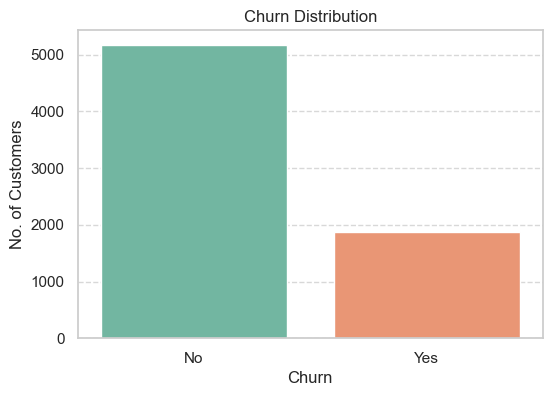

In [15]:
# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('No. of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.75)
plt.show()

In [16]:
# Churn Percentage
churn_percentage = churn_distribution / len(data) * 100
print(churn_percentage.round(2))

Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


### 4.2 Univariate Analysis of Numerical Features

Let's examine the distribution of key numerical variables to better understand customer behavior and potential patterns that relate to churn. This includes:

- `tenure`: The number of months the customer has stayed with the company.
- `MonthlyCharges`: The monthly fee charged to the customer.
- `TotalCharges`: The total amount charged to the customer (after converting to numeric).

These visualizations will help detect **skewness**, **outliers**, and **clusters** that may inform future transformations or feature engineering steps.


In [17]:
# Define numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Remove 'SeniorCitizen' since this is just a binary 0/1 values
numerical_columns = numerical_columns.drop(['SeniorCitizen'])

print(f'Numerical Columns: {numerical_columns.to_list()}')

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


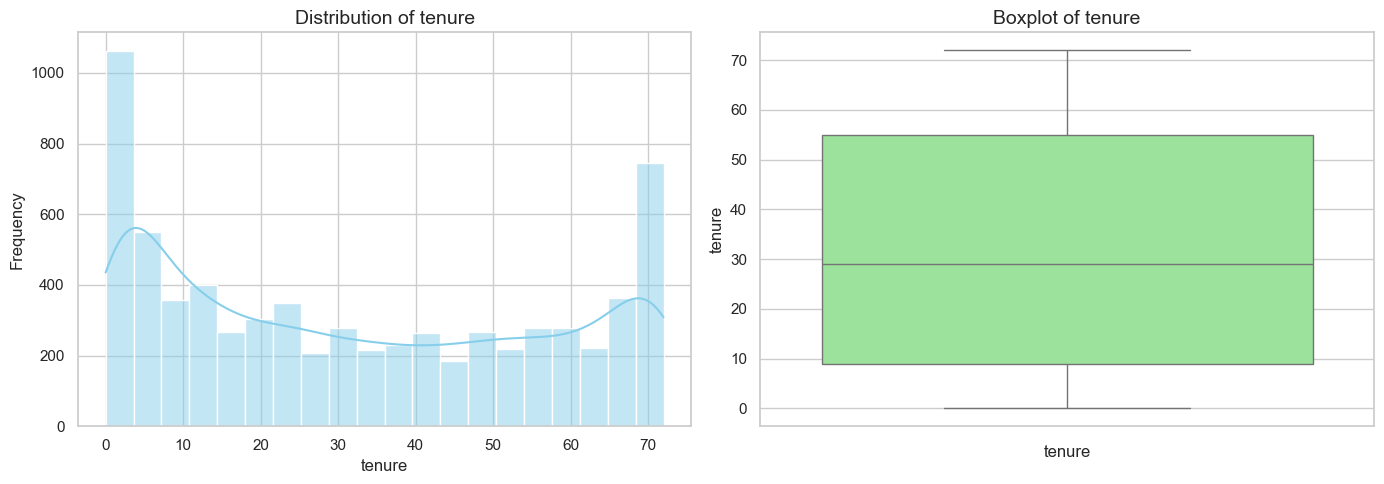

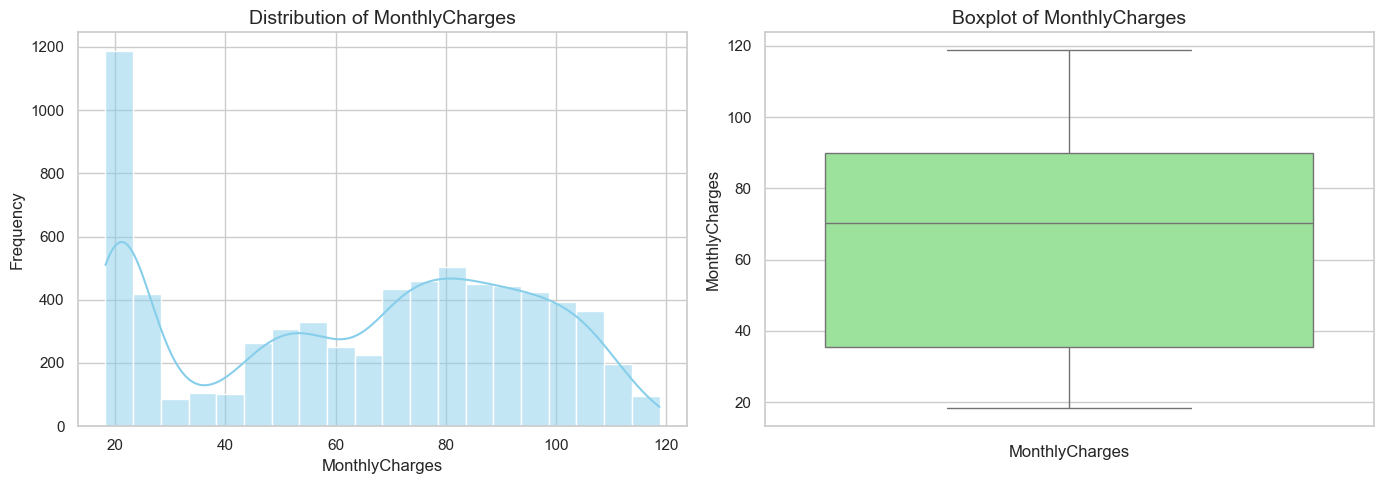

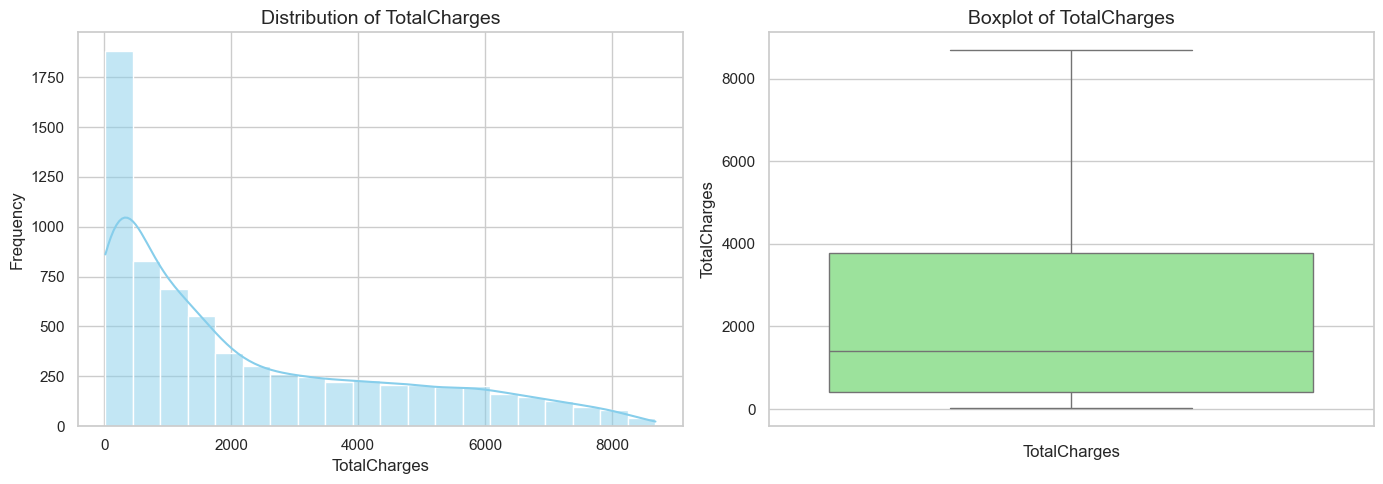

In [18]:
# Create histograms and box plots for each numeric column
for col in numerical_columns:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col], color='lightgreen')
    plt.title(f"Boxplot of {col}", fontsize=14)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Visual Analysis of Numerical Features (Histograms & Boxplots)

To better understand the distribution and spread of numerical data, we visualized the following features using **histograms** and **boxplots**:

- `tenure`
- `MonthlyCharges`
- `TotalCharges`

#### Tenure
- The histogram reveals a high concentration of customers with shorter tenures, particularly under 10 months. As tenure increases, the number of customers decreases.
- The **distribution is slightly right-skewed** with a skewness value of **0.24**, indicating a small tail toward higher tenure values.
- The **boxplot** confirms this by showing a moderately long upper whisker and few mild outliers.
- This implies that the company has a large proportion of relatively new customers.

#### Monthly Charges
- The histogram suggests a **slightly left-skewed** (negatively skewed) distribution (**skew = -0.22**), with many customers paying between \$60 and \$90.
- The **boxplot** shows a fairly symmetrical spread with a few outliers at the higher end of the scale (above \$100).
- The **median** monthly charge is **\$70.35**, and the distribution is relatively balanced, though pricing segmentation may be present.

#### Total Charges
- The histogram is **clearly right-skewed** (**skew = 0.96**), with most customers clustered toward the lower total charges.
- The **boxplot** shows a long upper whisker and several high-value outliers, indicating that a few long-term customers have paid significantly more over time.
- This pattern is expected because total charges accumulate with tenure.

#### Summary
- The visualizations reveal the presence of **skewness** and **outliers**, especially in the `TotalCharges` variable.
- These insights are important for future steps such as **feature scaling**, **outlier handling**, and **model selection**, particularly for algorithms sensitive to distribution shapes.


### 4.3 Univariate Analysis of Categorical Variables

In this section, we analyze the distribution of each categorical feature individually using **bar plots**. This helps us understand the frequency and balance of categories in features such as gender, internet service type, payment method, contract type, and others.

Understanding the class balance of these variables is important for:
- Identifying dominant or rare categories.
- Deciding whether any features need grouping or encoding.
- Exploring potential relationships with the target variable (`Churn`).

We'll plot bar charts for each categorical feature to visualize the count of each category.

In [19]:
# Remove 'customerID' from the categorical columns from the above selection
categorical_columns = categorical_columns.drop(['customerID'])
print(f'Categorical Columns: {categorical_columns.to_list()}')

Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


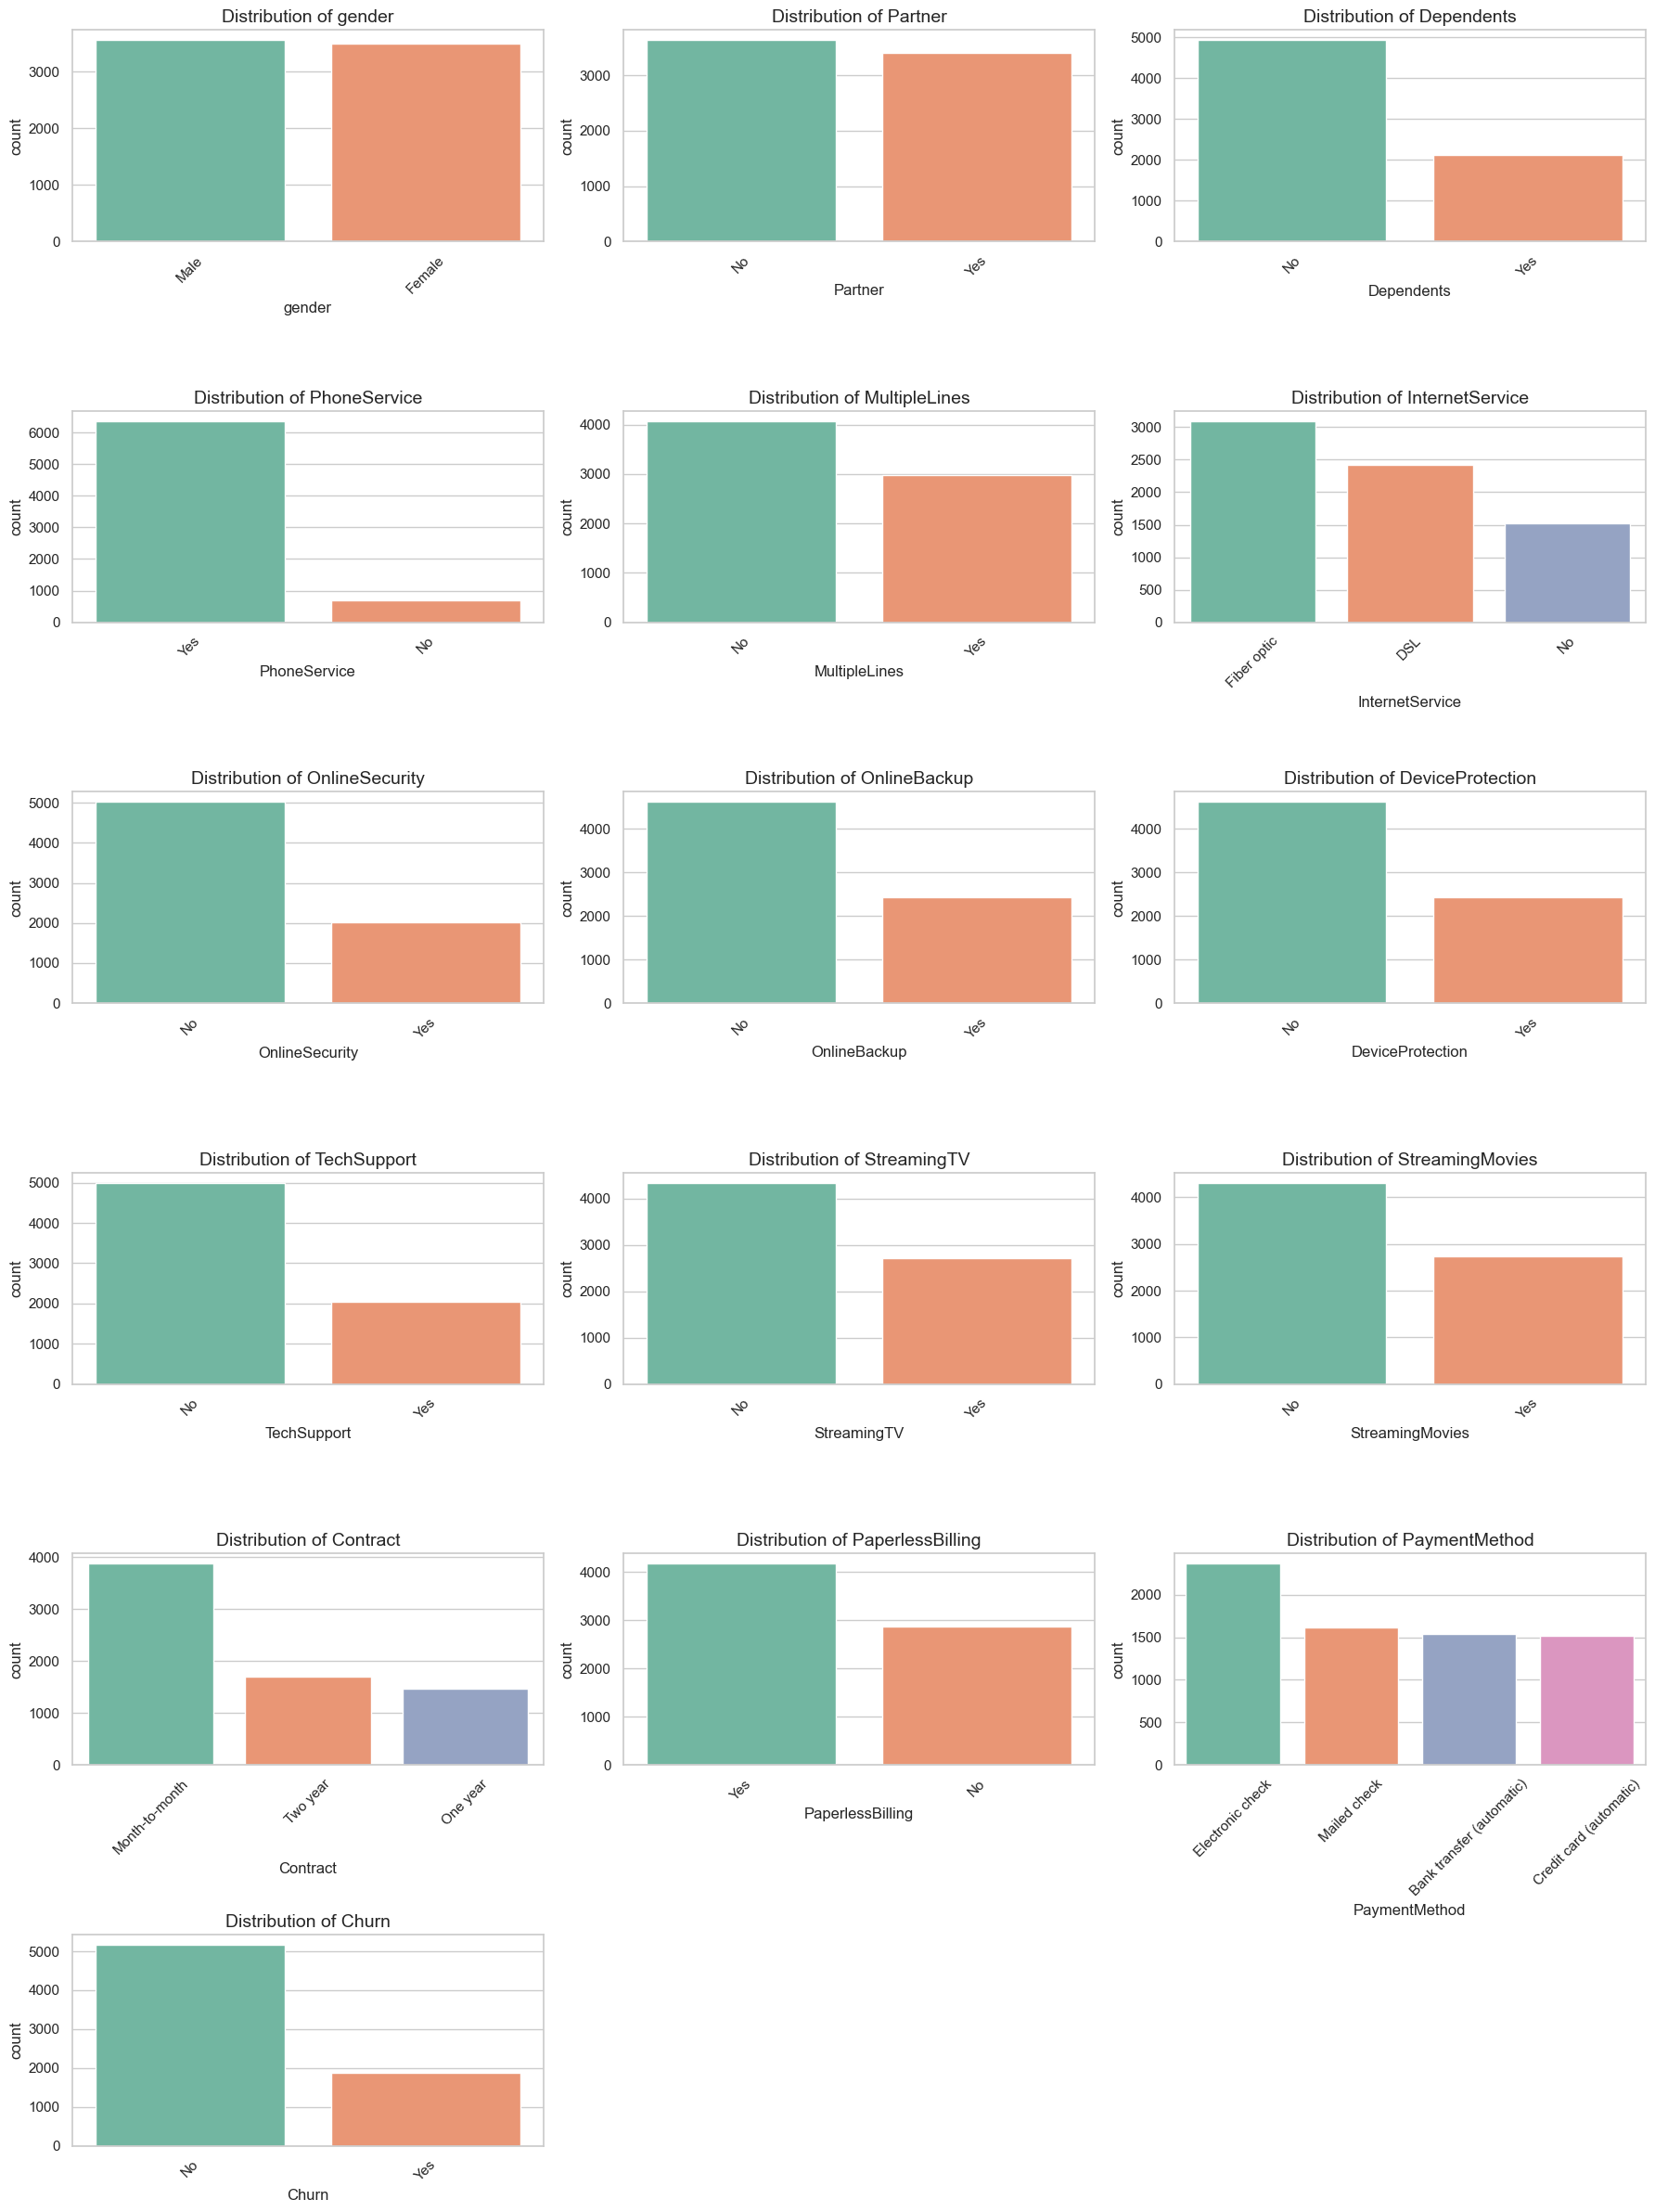

In [20]:
# Set up the grid
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Compute number of rows needed
plt.figure(figsize=(n_cols * 6, n_rows * 4))

# Loop through each categorical variable and create a bar plot
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=data, x=col, palette='Set2', order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Exploratory Analysis of Categorical Variables (Bar Plots)
We explored the distribution of categorical variables in the dataset using bar plots. Below is a summary of key observations:

- **Gender:** The dataset is fairly balanced between male and female customers, with a slight male majority.

- **Partner & Dependents:**

    - A slightly higher number of customers do not have partners (`No`: 3641 vs. `Yes`: 3402).
    - A large majority do not have dependents (`No`: 4933), suggesting that many customers might be single or without family obligations.

- **Phone Service & Multiple Lines:**

    - Most customers (`6361`) have phone service, with a smaller subset (`682`) not subscribed.
    - Of those with phone service, a significant number use multiple lines (`Yes`: 2971 vs. `No`: 4072), indicating multiple devices or users per account.

- **Internet Service:**

    - Most customers use Fiber optic (3096) or DSL (2421).
    - Only 1526 customers do not have internet service.

- **Online Services (Security, Backup, Device Protection, Tech Support):**

    - In each case, a majority of customers do not subscribe to these additional services.
    - For example:
        - OnlineSecurity: 71% do not have it.
        - TechSupport: nearly 71% do not have it.
    - This might indicate low add-on adoption, possibly due to pricing or awareness.

- **Streaming Services:**

    - Slightly more customers do not use **StreamingTV** or **StreamingMovies**, though the usage is still relatively high:
    - **StreamingMovies**: `Yes`: 2732 vs. `No`: 4311.
    - **StreamingTV**: `Yes`: 2707 vs. `No`: 4336.

- **Contract Type:**

    - Majority of customers (3875) are on Month-to-month contracts.
    - One year and Two year contracts are less common (1473 and 1695 respectively), which may suggest customers prefer flexibility.

- **Paperless Billing:**

    - More than half (`4171`) opted into PaperlessBilling, showing a trend toward digital communication.

- **Payment Method:**

    - Electronic check is the most popular method (2365), followed by Mailed check.
    - Automatic options like Bank transfer and Credit card are used by about 21–22% each, indicating moderate adoption of automatic payments.

- **Churn:**

    - Majority of customers did not churn (`No`: 5174), but a significant portion (`Yes`: 1869) did.
    - This confirms class imbalance, which we may need to address in predictive modeling later.

### 4.4 Bivariate Analysis: Numerical Features vs. Churn
Now that we have examined the distributions of individual features, we move to bivariate analysis to explore how numerical features relate to the target variable `Churn`.

The main goals of this step are:

- To identify patterns or trends in how numerical features vary between customers who churn and those who don't.
- To determine which numerical variables are potentially strong predictors of churn.
- To spot opportunities for hypothesis formulation and statistical testing.

We'll do this by using:

- Boxplots to compare the distribution of each numerical feature across churned and non-churned customers.
- Violin plots or strip plots for additional insight into the spread and density (optional).
- Group-wise summary statistics (mean/median values by churn group) for numerical features.

This analysis will help us understand which features (like `MonthlyCharges`, `tenure`, or `TotalCharges`) differ significantly between churned and non-churned customers.

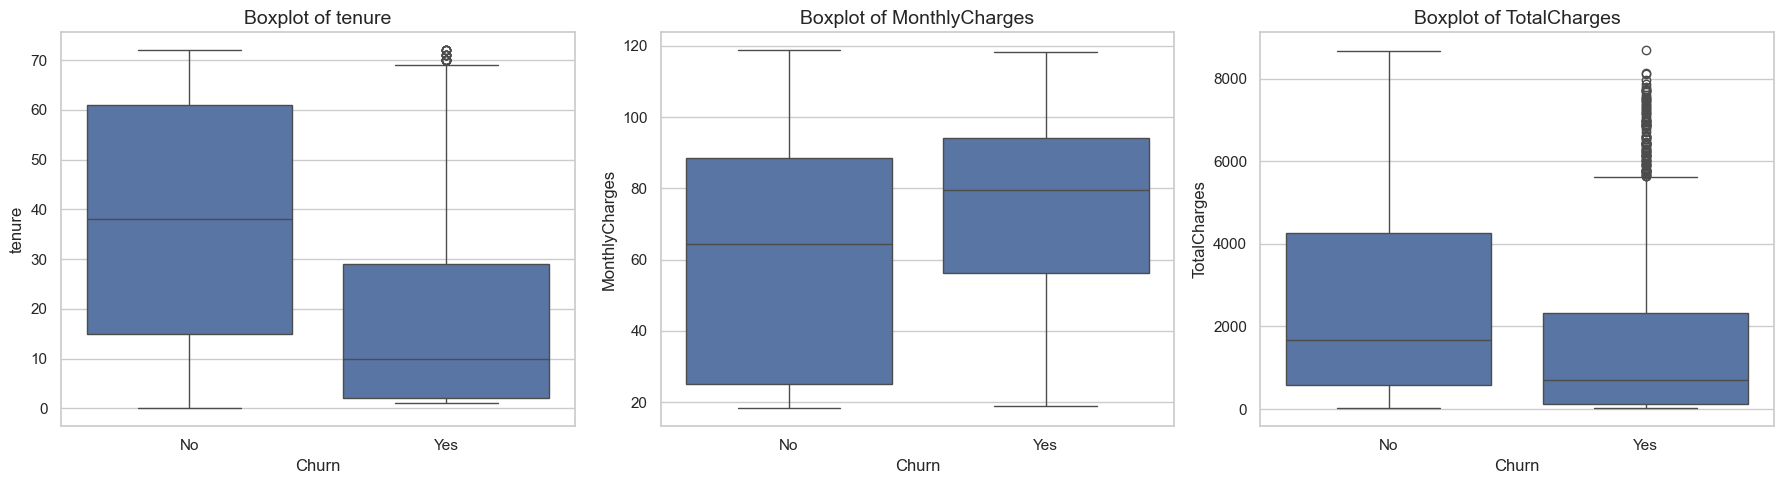

In [21]:
# Create box plots for each numerical column against the target 'Churn'
plt.figure(figsize=(18, 5))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data, x='Churn', y=col)
    plt.title(f"Boxplot of {col}", fontsize=14)

plt.tight_layout()
plt.show()

In [22]:
# Group-wise summary statistics for churned vs non-churned customers
data.groupby('Churn')[numerical_columns].agg(['mean', 'median', 'std'])

tenure                   MonthlyCharges                     \
            mean median        std           mean  median        std   
Churn                                                                  
No     37.569965   38.0  24.113777      61.265124  64.425  31.092648   
Yes    17.979133   10.0  19.531123      74.441332  79.650  24.666053   

      TotalCharges                         
              mean    median          std  
Churn                                      
No     2552.882494  1679.525  2327.590132  
Yes    1531.796094   703.550  1890.822994

### Interpretation of Numerical Features by Churn

To better understand how customer behavior differs between those who churned and those who didn’t, we analyzed the three main numerical features: **tenure**, **MonthlyCharges**, and **TotalCharges**, grouped by the `Churn` variable.

#### Tenure
- **Customers who churned** have a **significantly lower average tenure** (mean ≈ 18 months, median = 10) compared to those who didn’t churn (mean ≈ 38 months, median = 38).
- This suggests that churn is much more common among **new or short-term customers**, highlighting the importance of early customer retention.

#### Monthly Charges
- The **average MonthlyCharges** is noticeably **higher for churned customers** (mean ≈ 74.44) compared to those who stayed (mean ≈ 61.27).
- This could imply that **higher monthly costs might contribute to dissatisfaction** and churn.

#### Total Charges
- **TotalCharges** is also significantly **lower among churned customers** (mean ≈ 1531.80, median ≈ 703.55) than for loyal customers (mean ≈ 2555.34, median ≈ 1683.60).
- This aligns with the tenure difference — customers who leave early simply don’t have time to accumulate high total charges.

#### Insight
These patterns provide strong evidence that **short tenure and higher monthly charges are associated with customer churn**. These features could be especially useful predictors in a machine learning model and may also guide business strategies like targeted retention offers for new high-paying customers.


### 4.5 Exploring Categorical Features by Churn

Understanding how categorical features relate to customer churn can reveal valuable patterns. In this section, we analyze the distribution of churn (`Yes` or `No`) across key categorical variables such as:

- Gender
- Partner and Dependents
- Internet and Phone Service features
- Contract type, Paperless Billing, and Payment Method

We'll use **count plots** and **percentage-based bar plots** to uncover which categories are more likely to churn. This insight will help identify potential churn risk factors and guide feature selection for modeling.


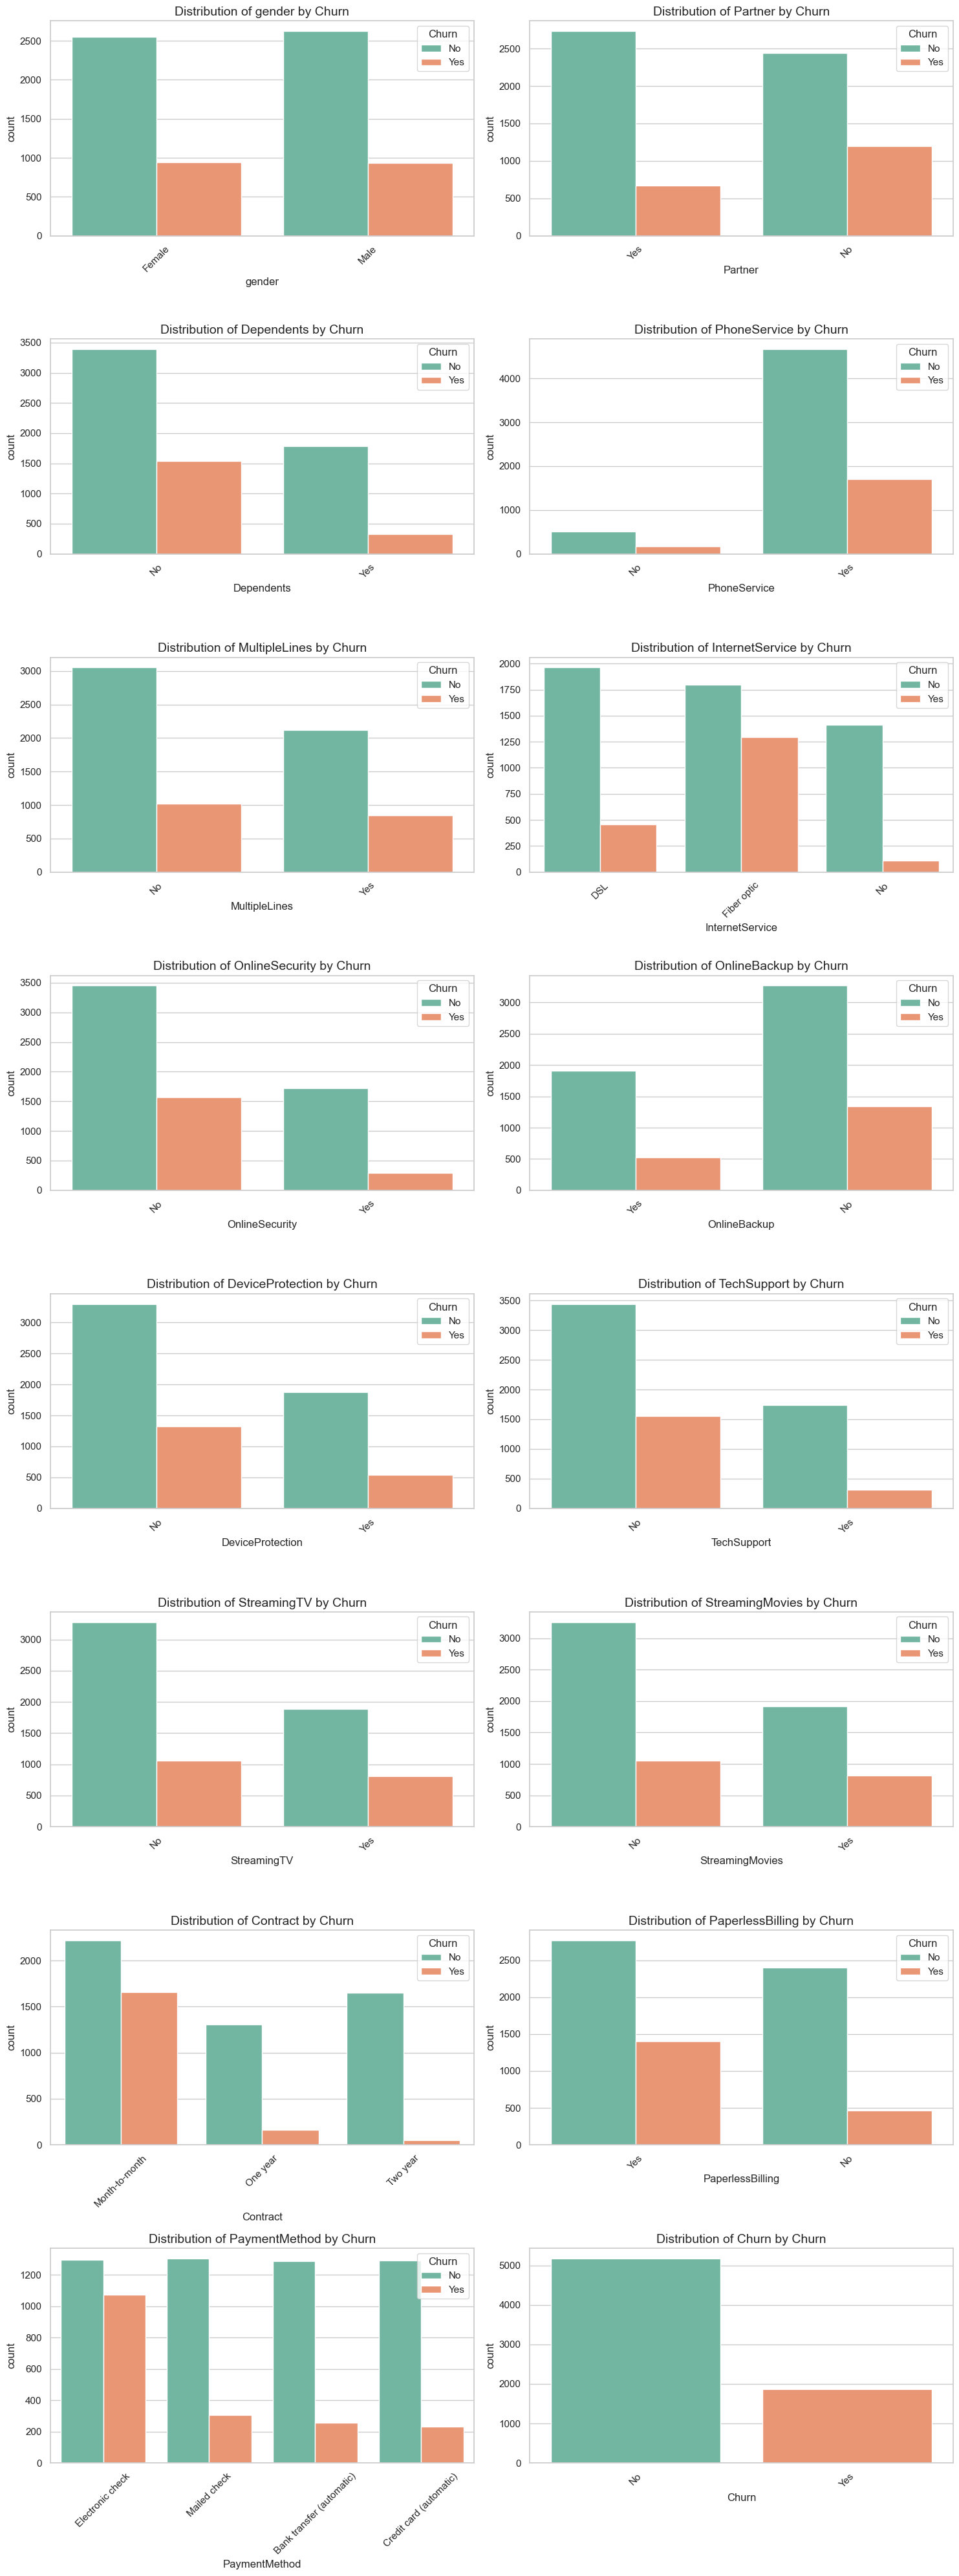

In [23]:
# Visualizing Categorical Features
def plot_categorical_by_chun(data, cols, target='Churn'):
    """
    Plots count plots for each categorical column showing churn distribution.

    Parameters:
    data (pd.DataFrame): The dataset containing the features and target.
    cols (list): List of categorical column names to plot.
    target (str): Name of the target column. Default is 'Churn'.

    Returns:
    None
    """

    n_cols = 2
    n_rows = int(np.ceil(len(cols) / n_cols))

    plt.figure(figsize=(15, 5 * n_rows))

    for i, col in enumerate(cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.countplot(data=data, x=col, hue=target, palette='Set2')
        plt.title(f"Distribution of {col} by {target}", fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()


plot_categorical_by_chun(data, categorical_columns)

### Categorical Variable Analysis: Insights from Churn Distribution

We explored how the target variable `Churn` is distributed across various categorical features. The values represent the **proportion of customers who churned (`Yes`) or stayed (`No`)** within each category. Here are the key insights:


#### Gender
- Both Male and Female customers have nearly identical churn rates (~26–27%).
- **Conclusion**: Gender does not appear to be a strong predictor of churn.

#### Partner & Dependents
- Customers **with partners** have a lower churn rate (20%) than those without (33%).
- Customers **with dependents** churn far less (15%) compared to those without (31%).
- **Conclusion**: Having a partner or dependents correlates with **higher retention**.

#### Internet & Online Services
- **Fiber optic users** have the highest churn (42%), while DSL users are more stable (19%).
- Customers **without internet service** churn very little (7%).
- Not using online security, backup, or tech support is associated with **higher churn** (~29–31%).
- **Conclusion**: Churn is much higher among fiber users and those **not using value-added services**.

#### Contract Type
- **Month-to-month contracts** have the highest churn (43%), while **two-year contracts** show just 3%.
- **Conclusion**: **Long-term contracts are strongly associated with customer retention.**

#### Billing Preferences
- Customers with **paperless billing** churn more (34%) than those receiving paper bills (16%).
- This might indicate a behavioral difference (e.g., digital customers are more likely to switch).

#### Payment Method
- **Electronic check** users show a much higher churn (45%) than other methods like credit card (15%) or bank transfer (17%).
- **Conclusion**: The method of payment is a powerful churn signal—some methods may reflect less loyal customer segments.


### Summary
Several categorical variables reveal strong relationships with churn:
- **Contract Type**, **Payment Method**, and **Internet Service** are especially informative.
- Features related to **support services** (Online Security, Tech Support) suggest that lack of added value may push users away.
- We'll explore these further in modeling and hypothesis testing stages.

### 4.6 Multivariate Analysis

In this section, we explore how multiple features interact with each other and how these interactions may influence customer churn.

We'll use:
- **Correlation matrix** to assess linear relationships between numerical features.
- **Stacked bar charts / grouped bar plots** to observe joint effects of two categorical variables on churn.
- **Pair plots** (if needed) for visualizing pairwise distributions and interactions between numerical features.

This deeper layer of analysis helps uncover patterns that may not be visible when examining variables in isolation.


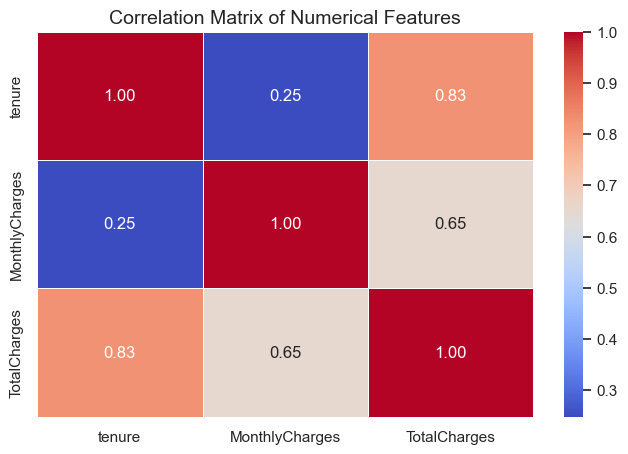

In [24]:
# Correlation matrix heatmap for numerical features
plt.figure(figsize=(8, 5))

# Calculate correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()

### Correlation Matrix Analysis (Numerical Features)

To examine potential linear relationships among numerical variables, we computed the Pearson correlation coefficients between `tenure`, `MonthlyCharges`, and `TotalCharges`.

| Feature Pair               | Correlation | Interpretation |
|----------------------------|-------------|----------------|
| `tenure` ↔ `TotalCharges`        | **0.83**     | Strong positive correlation. Longer tenure is associated with higher accumulated charges, which is expected as customers pay monthly over time. |
| `MonthlyCharges` ↔ `TotalCharges` | **0.65**     | Moderate positive correlation. Customers with higher monthly charges tend to accumulate more total charges, but the relationship is not perfectly linear. |
| `tenure` ↔ `MonthlyCharges`       | **0.25**     | Weak positive correlation. The duration a customer has been with the company does not strongly influence their monthly charges, likely due to varied service plans and usage. |

**Conclusion:**  
- `TotalCharges` is effectively a function of both `tenure` and `MonthlyCharges`, making it a composite variable.
- There is no concerning multicollinearity among the features, but we may need to assess redundancy between `tenure` and `TotalCharges` during feature selection or modeling.


## Summary of Key Findings from EDA

Based on our exploratory data analysis, we discovered several important patterns and trends that may inform future modeling and hypothesis testing:

### 1. Numerical Variables
- **Tenure** shows a strong positive correlation with `TotalCharges` (r ≈ 0.83), indicating that longer customer lifespans lead to higher cumulative charges.
- Customers who churn tend to have **lower tenure**, **lower total charges**, and **higher monthly charges** than those who stay.
- `MonthlyCharges` has a moderate correlation with `TotalCharges`, but only a weak correlation with `tenure`.

### 2. Categorical Variables and Churn
- Customers with **Month-to-month contracts**, **Paperless Billing**, and who pay by **Electronic Check** have the highest churn rates.
- Customers with **Fiber Optic internet** are more likely to churn compared to those with **DSL** or **No Internet**.
- Support-related services like **OnlineSecurity**, **OnlineBackup**, and **TechSupport** show that customers with these services are **less likely to churn**.
- Customers without **dependents** and **partners** have significantly higher churn rates.

### 3. Data Cleaning Insights
- The `TotalCharges` column initially had object data type due to formatting but was successfully converted to numeric.
- No significant missing values were found after handling inconsistencies in `TotalCharges`.

### 4. Behavioral Patterns
- The most vulnerable customers appear to be:
  - New or short-term customers with high monthly bills.
  - Customers lacking support services.
  - Month-to-month users paying electronically.

These findings provide a strong foundation for **feature engineering**, **hypothesis testing**, and **model building** in the next phases.


## Step 5: Feature Engineering

In this step, we will transform and engineer the features in our dataset to make them suitable for machine learning algorithms. Feature engineering includes:

-  **Encoding categorical variables**: Most ML models require numeric input. We will apply appropriate encoding techniques such as:
    - **One-hot encoding** for nominal variables (no inherent order),
    - **Binary encoding** for binary categorical variables,
    - **Ordinal encoding** (if applicable) for ordered categories.
  
-  **Creating new features**: We may derive additional insights from existing data. For example:
    - Grouping or binning `tenure` into categories like `New`, `Loyal`, `Long-term`,
    - Creating interaction terms like `MonthlyCharges × Tenure` (i.e. approximated `TotalCharges`),
    - Flag columns like `Has_InternetService` or `Is_Senior`.

-  **Handling redundant columns**: We'll drop columns that are identifiers (`customerID`) or are now encoded into new representations.

-  **Preparing for modeling**: We'll ensure the final dataset contains clean, numeric, and informative features ready for training supervised ML models.


### 5.1 Encoding Categorical Variables

To prepare the data for machine learning algorithms, we need to convert categorical variables into numerical formats.

1. **Binary Encoding**: For binary columns with 'Yes'/'No' values, we will map them to 1 and 0 respectively.
2. **One-Hot Encoding**: For nominal columns (with more than two categories), we will use one-hot encoding to prevent any ordinal misinterpretation.
3. **Dropping Irrelevant Columns**: The `customerID` column is just an identifier and will be dropped.
4. **Final Dataset Check**: After encoding, we will ensure the dataset contains only numeric values and is ready for modeling.


#### 5.1.1 Binary Encoding of Yes/No Features

In this step, we convert binary categorical features (those with 'Yes' and 'No' values) into numerical format using binary encoding. This is essential for preparing the data for hypothesis testing and machine learning algorithms, which require numerical input.

Each 'Yes' value will be encoded as `1`, and each 'No' value will be encoded as `0`.

The following columns will be binary encoded:

- `Partner`
- `Dependents`
- `PhoneService`
- `PaperlessBilling`
- `Churn` *(target variable)*
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`

In [25]:
# List of binary categorical columns to encode
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]


def binary_encode(df, columns):
    """
    Encodes binary categorical columns with 'Yes' as 1 and 'No' as 0.

    Parameters:
    df (pd.DataFrame): The dataframe containing binary categorical columns.
    columns (list): List of column names to be binary encoded.

    Returns:
    pd.DataFrame: The dataframe with binary encoded columns.
    """
    for col in columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    return df


# Apply binary encoding
encoded_data = binary_encode(data, binary_cols)

# Check if encoding was successful
encoded_data[binary_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,1,0,1,0,0,0
2,0,0,1,1,1,1,1,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,0
4,0,0,1,1,1,0,0,0,0,0,0


#### 5.1.2 Encoding Remaining Categorical Features

After binary encoding the Yes/No categorical columns, several other categorical features still need to be transformed into numeric format to make them usable for analysis and modeling.

<br/>

##### Identify Remaining Categorical Columns
We begin by listing all object-type columns and excluding:
- Previously binary-encoded features (e.g., `Partner`, `Dependents`, etc.)

<br/>

#####  Encoding Strategy
We will apply the following encoding methods:

- **Ordinal Encoding**: For columns where categories have an inherent order.  
  - Example: `Contract` (e.g., "Month-to-month" < "One year" < "Two year")

- **One-Hot Encoding**: For nominal (unordered) categorical variables.  
  - Examples: `InternetService`, `PaymentMethod`, etc.

This step ensures that our machine learning models can interpret categorical data effectively without introducing unintended ordinal relationships or bias.


In [26]:
# Exclude already encoded binary columns
remaining_cat_cols = [col for col in categorical_columns if col not in binary_cols]

# Show columns that still need encoding
print("Remaining categorical columns to encode:", remaining_cat_cols)

Remaining categorical columns to encode: ['gender', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']


In [27]:
# Remaining categorical columns to encode
nominal_cols = remaining_cat_cols

# Perform one-hot encoding using Pandas 'get_dummies()'
encoded_cols = pd.get_dummies(encoded_data[nominal_cols], drop_first=True)

# Concatenate the encoded columns back to the original DataFrame (excluding the original nominal columns)
data_encoded = pd.concat([encoded_data.drop(columns=nominal_cols), encoded_cols], axis=1)

# Convert boolean columns to integer (0/1)
data_encoded = data_encoded.astype(int)

# Display the updated shape and first few rows
print(f"Shape after encoding: {data_encoded.shape}")
data_encoded.head()

Shape after encoding: (7043, 24)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Churn,gender_Male,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,0,0,0,45,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


### 5.2 Creating New Features

Beyond encoding existing columns, feature engineering also involves the creation of new features that may capture hidden patterns, domain knowledge, or customer behavior.

In this section, we will create a few additional features derived from the existing columns:

- **TotalServices**: Total number of optional services a customer has subscribed to (e.g., OnlineSecurity, TechSupport, StreamingTV, etc.).
- **TenureGroup**: Categorize customers based on their tenure into 'New', 'Regular', and 'Loyal'.
- **AvgMonthlySpend** *(optional)*: Estimate the average monthly spend using `TotalCharges / tenure`, if tenure > 0.
- **HasProtection**: Flag customers with either OnlineSecurity, OnlineBackup, DeviceProtection, or TechSupport.
- **IsAutoPayment**: Flag customers who use automatic payment methods (e.g., 'Credit card (automatic)', 'Bank transfer (automatic)').

Creating these engineered features can improve model performance and add interpretability by capturing useful behavioral patterns from existing variables.

#### 5.2.1 Creating the `TotalServices` feature
One way to better understand customer engagement is to measure how many services a customer subscribes to. The `TotalServices` feature counts all subscribed services across multiple columns such as:

- `PhoneService`
- `MultipleLines`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`

Since these service columns have already been binary encoded (1 for subscribed, 0 for not subscribed),
we can simply sum them row-wise to get the total number of services each customer uses.

This feature can help identify:

- Highly engaged customers (more services = lower churn probability in many cases)
- Customers with minimal services (higher churn risk)

In [52]:
# List the services columns
services_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies']

# Create a copy of the encoded data
data_engineered = data_encoded.copy()

# Create the 'TotalServices' feature
data_engineered['TotalServices'] = data_engineered[services_columns].sum(axis=1)

# Display first few rows services columns and the new 'TotalServices' to confirm
data_engineered[services_columns + ['TotalServices']].head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalServices
0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,2
2,1,1,0,0,0,0,2
3,1,0,1,1,0,0,3
4,0,0,0,0,0,0,0


#### 5.2.2 Creating the `tenure_group` feature

Customer tenure (how long someone has been with the company) is currently stored as a numeric variable in months.
While this is useful, sometimes grouping customers into tenure categories can help us identify patterns in behavior,
especially in churn analysis.

For example:

- New customers may still be exploring the service.
- Mid-term customers might be deciding whether to commit longer.
- Long-term customers tend to be more loyal.

This feature will help in:

- Identifying churn patterns based on customer loyalty stage.
- Improving segmentation for future predictive models.

In [29]:
# Create a new categorical column 'tenure_group' based on tenure ranges
data_engineered['tenure_group'] = pd.cut(
    data_engineered['tenure'],
    bins=[-1, 12, 24, 48, 72],  # Define bin edges in months
    labels=['0-1 year', '1-2 years', '2-4 years', '4-6 years']  # Labels for each bin
)

data_engineered[['tenure', 'tenure_group']].head()

,tenure,tenure_group
0,1,0-1 year
1,34,2-4 years
2,2,0-1 year
3,45,2-4 years
4,2,0-1 year


#### 5.2.3 Creating the `AverageChargesPerService` Feature
The `AverageChargesPerService` feature is designed to capture how much a customer is paying per subscribed service.
It is calculated as:

$$AverageChargesPerService = \frac{MonthlyCharges}{TotalServices}$$
 
Why it’s useful:

- Customers paying more per service might be on premium plans.
- Customers paying less per service could be on discounted bundles.
- This ratio can reveal patterns between service cost structure and churn probability.

**Note:** To avoid division by zero (for customers with `TotalServices` = 0),
we’ll replace such values with NaN or 0 depending on context.

In [30]:
# Create 'AverageChargesPerService' feature
data_engineered['AverageChargesPerService'] = data_engineered.apply(
    lambda row: row['MonthlyCharges'] / row['TotalServices'] if row['TotalServices'] > 0 else 0,
    axis=1
)

# Verify the new column
data_engineered[['MonthlyCharges', 'TotalServices', 'AverageChargesPerService']].head()

,MonthlyCharges,TotalServices,AverageChargesPerService
0,29,1,29.0
1,56,2,28.0
2,53,2,26.5
3,42,3,14.0
4,70,0,0.0


#### 5.2.4 Creating the `HasMultipleServices` Feature

This binary feature indicates whether a customer is subscribed to more than one service.

**Why this is useful:**
- Customers with multiple services may have higher satisfaction due to bundled offerings, potentially lowering churn.
- On the other hand, if dissatisfaction occurs, customers with multiple services may represent a bigger revenue loss.

**Logic:**
- `1` → Customer has more than one service.
- `0` → Customer has one or no services.

**Formula:**
$$HasMultipleServices = \left\{ \begin{array}{cl}
1, &\text{if } TotalServices > 1\\
0, &\text{otherwise}
\end{array} \right.$$

In [31]:
# Create 'HasMultipleServices' feature
data_engineered['HasMultipleServices'] = (data_engineered['TotalServices'] > 1).astype(int)

# Preview the new features
data_engineered[['TotalServices', 'HasMultipleServices']].head()

,TotalServices,HasMultipleServices
0,1,0
1,2,1
2,2,1
3,3,1
4,0,0


## Step 6: Mini-EDA on Newly Engineered Features

What we’ll do (step-by-step):

- Ordinal-encode `tenure_group` → `tenure_group_encoded`.
- Print descriptive statistics.
- Plot simple visualizations (countplots / histogram).
- Add a correlation heatmap including the new numeric features and Churn.
- Compute churn rates by the new features (helpful for choosing hypotheses).

### 6.1 Encode `tenure_group` as ordinal integers

`tenure_group` has an order (0–1 < 1–2 < 2–4 < 4–6 years). We map to integers so numeric tests and correlations make sense.

`tenure_group` categories will be mapped to integers:
- `0-1 year`  -> 0
- `1-2 years` -> 1
- `2-4 years` -> 2
- `4-6 years` -> 3

We create a new column `tenure_group_encoded` and then show both original and encoded value counts.


In [32]:
# Mapping for tenure buckets -> ordinal integers
tenure_map = {
    '0-1 year': 0,
    '1-2 years': 1,
    '2-4 years': 2,
    '4-6 years': 3,
}

# Create the encoded column (will be NaN where tenure_group is missing or unexpected)
data_engineered['tenure_group_encoded'] = data_engineered['tenure_group'].map(tenure_map)

# Preview the encoding
data_engineered[['tenure_group', 'tenure_group_encoded']].head()

,tenure_group,tenure_group_encoded
0,0-1 year,0
1,2-4 years,2
2,0-1 year,0
3,2-4 years,2
4,0-1 year,0


In [33]:
# Quick dtype check
data_engineered[['tenure_group', 'tenure_group_encoded']].dtypes

tenure_group            category
tenure_group_encoded    category
dtype: object

In [34]:
# Let's convert 'tenure_group_encoded' to type integer
data_engineered['tenure_group_encoded'] = data_engineered['tenure_group_encoded'].astype(int)

# Quick dtype check
data_engineered['tenure_group_encoded'].dtype

dtype('int64')

### 6.2 Descriptive statistics for the new features

Quick numeric summaries help you spot scale issues and outliers.

We will display:
- `describe()` for numeric features
- value_counts for discrete features (TotalServices, HasMultipleServices, tenure_group_encoded)

In [35]:
# Descriptive stats for the numerical engineered features
numerical_engineered_features = [
    'TotalServices', 'AverageChargesPerService', 'HasMultipleServices', 'tenure_group_encoded'
]

data_engineered[numerical_engineered_features].describe()

,TotalServices,AverageChargesPerService,HasMultipleServices,tenure_group_encoded
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.037910,23.212232,0.547778,1.551754
std,1.847682,22.564484,0.497747,1.226418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,2.000000,20.666667,1.000000,2.000000
75%,3.000000,32.000000,1.000000,3.000000
max,6.000000,87.000000,1.000000,3.000000


### 6.3 Visual checks (countplots & histogram)

Quick numeric summaries help you spot scale issues and outliers.

Plots:
- Countplot for `TotalServices` (0..6)
- Histogram + KDE for `AverageChargesPerService`
- Countplot for `HasMultipleServices` (0/1)
- Countplot for `tenure_group_encoded` with readable xtick labels

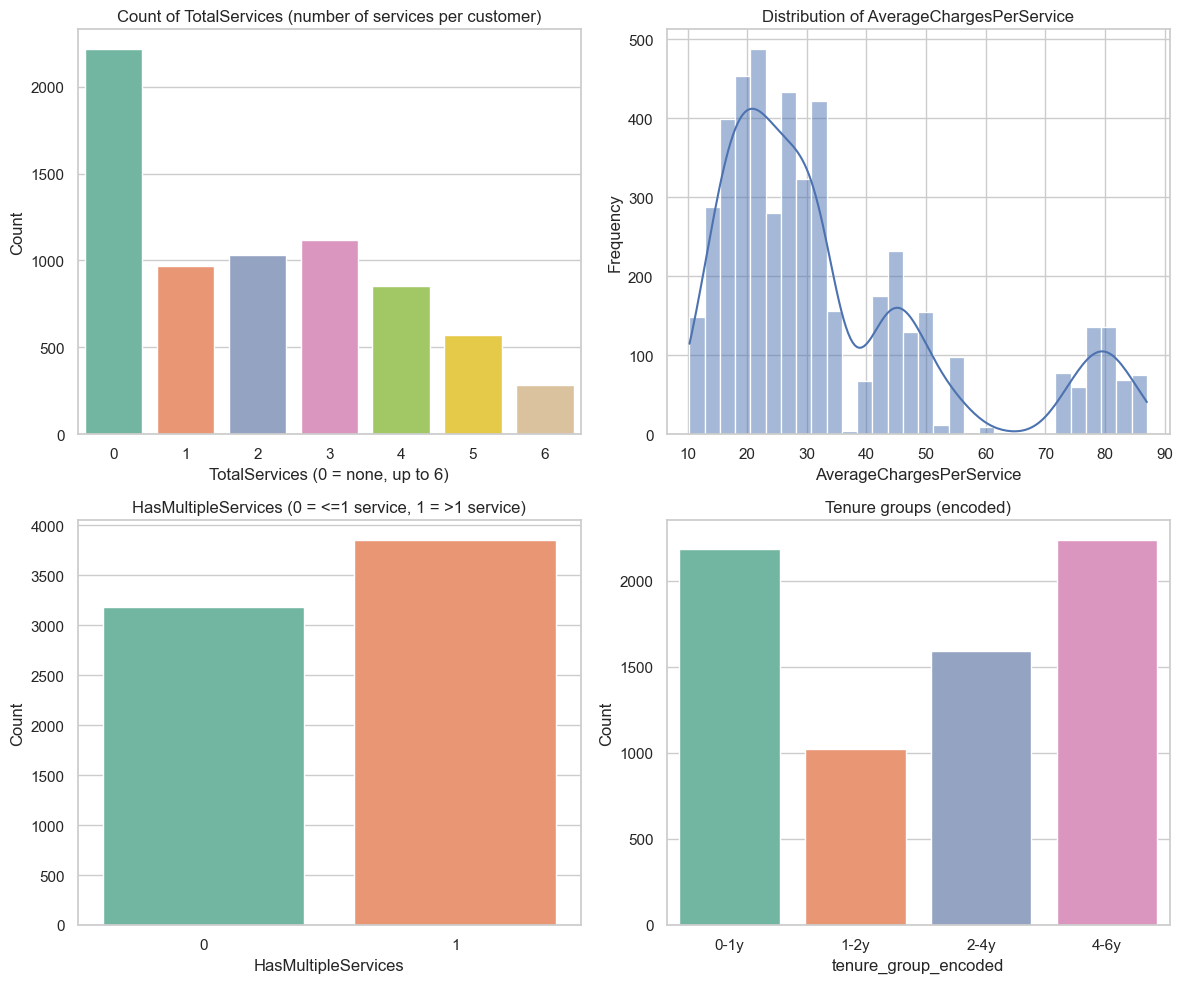

In [36]:
plt.figure(figsize=(12, 10))

# 1. TotalServices countplot
plt.subplot(2, 2, 1)
order_ts = sorted(data_engineered['TotalServices'].dropna().unique())
sns.countplot(x='TotalServices', data=data_engineered, order=order_ts, palette='Set2')
plt.title('Count of TotalServices (number of services per customer)')
plt.xlabel('TotalServices (0 = none, up to 6)')
plt.ylabel('Count')

# 2. AverageChargesPerService distribution
plt.subplot(2, 2, 2)
sns.histplot(data_engineered['AverageChargesPerService'].replace(0, np.nan).dropna(), bins=30, kde=True)
# Note: replace(0, np.nan) is optional — zeros represent customers with no services
plt.title('Distribution of AverageChargesPerService')
plt.xlabel('AverageChargesPerService')
plt.ylabel('Frequency')

# 3. HasMultipleServices (binary)
plt.subplot(2, 2, 3)
sns.countplot(x='HasMultipleServices', data=data_engineered, palette='Set2')
plt.title('HasMultipleServices (0 = <=1 service, 1 = >1 service)')
plt.xlabel('HasMultipleServices')
plt.ylabel('Count')

# 4. tenure_group_encoded counts with readable labels
plt.subplot(2, 2, 4)
order_tg = [0, 1, 2, 3]
sns.countplot(x='tenure_group_encoded', data=data_engineered, order=order_tg, palette='Set2')
plt.title('Tenure groups (encoded)')
plt.xlabel('tenure_group_encoded')
plt.xticks(ticks=[0, 1, 2, 3], labels=['0-1y', '1-2y', '2-4y', '4-6y'])
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Mini-EDA Summary for Newly Engineered Features

**1. TotalServices**
- **Distribution:**
  - `0` services: **2,219 customers** (31.5% of dataset)
  - `1` service: 966 customers
  - `2` services: 1,033 customers
  - `3` services: 1,118 customers
  - `4` services: 852 customers
  - `5` services: 571 customers
  - `6` services: 284 customers
- **Observation:** The largest group has **no services at all**, which might represent customers who have churned quickly or signed up but never added any services.
- The counts decline steadily after 3–4 services, with very few customers taking the maximum (6 services).  
- Hypothesis potential: Customers with more services may be less likely to churn due to service bundling or higher switching costs.

**2. HasMultipleServices**
- **Binary split:**
  - `Yes` (>1 service): **3,858 customers** (54.8%)
  - `No` (≤1 service): **3,185 customers** (45.2%)
- **Observation:** A slight majority of customers hold multiple services.  
- Hypothesis potential: Multiple services could indicate stronger customer commitment, potentially reducing churn.

**3. tenure_group_encoded**
- Distribution (encoded values correspond to tenure buckets):
  - `0` → 0–1 year: **2,186 customers** (31.0%)
  - `1` → 1–2 years: 1,024 customers
  - `2` → 2–4 years: 1,594 customers
  - `3` → 4–6 years: 2,239 customers
- **Observation:** The dataset has a large share of both **new customers (0–1 year)** and **longer-term customers (4–6 years)**.
- **Hypothesis potential:** Churn is often highest among very new customers and lowest among long-term customers; a chi-square test could confirm this.

**4. AverageChargesPerService**
- **Stats:**
  - **Count:** 7,043
  - **Mean:** &#36;23.21
  - **Std dev:** &#36;22.56
  - **Min:** &#36;0.00
  - **25th percentile:** &#36;0.00
  - **Median (50%):** &#36;20.67
  - **75th percentile:** &#36;32.00
  - **Max:** &#36;87.00
- **Observation:** 
  - **Zero values** correspond to customers with no active services, which is consistent with `TotalServices = 0`.
  - Among paying customers, the median cost per service is around \$20–\$32.
  - There may be a subgroup of high-spenders at the upper tail (\$87 max).
- **Hypothesis potential:** Higher per-service charges could correlate with churn if customers perceive poor value, or with loyalty if high spenders receive premium services.

**Overall insight:**  
These engineered features are all interpretable and potentially predictive. `TotalServices` and `HasMultipleServices` may capture cross-selling effects; `tenure_group_encoded` represents customer lifecycle stage; `AverageChargesPerService` adds a spending-behavior angle. Each of these can be tested against churn in the hypothesis testing stage.

### 6.4 Correlation heatmap including engineered features

See how new numeric features relate to `Churn` and other numeric columns.

We will compute Pearson correlation among:
- `tenure`, `MonthlyCharges`, `TotalCharges`
- `TotalServices`, `AverageChargesPerService`, `HasMultipleServices`, `tenure_group_encoded`
- `Churn` (already encoded 0/1)

This gives a quick visual of linear relationships and possible multicollinearity.

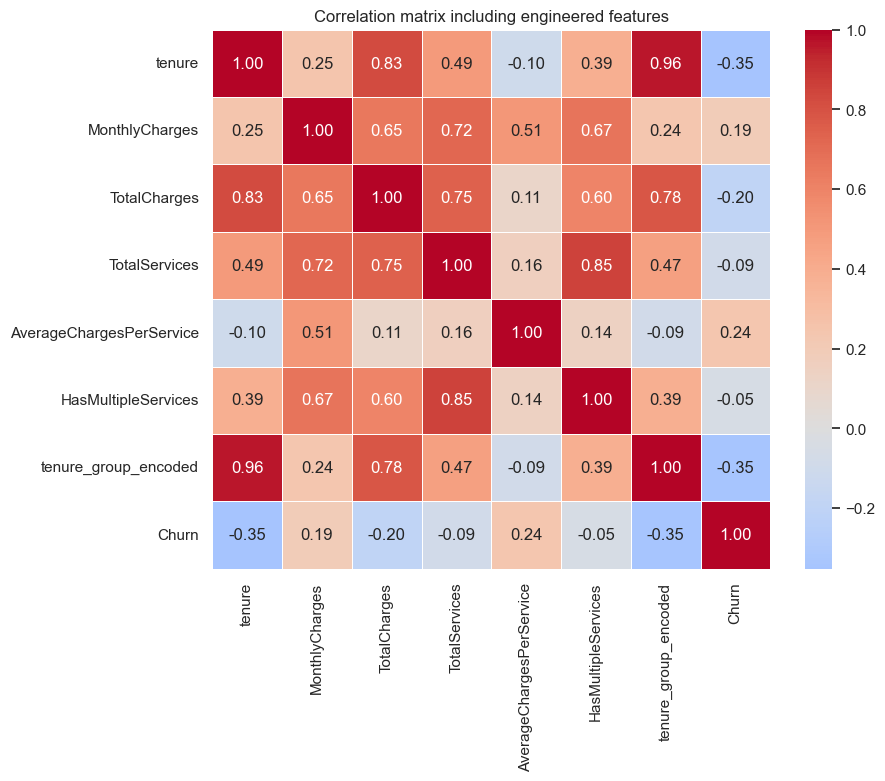

In [37]:
# Columns to include in correlation check
corr_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'TotalServices', 'AverageChargesPerService', 'HasMultipleServices',
    'tenure_group_encoded', 'Churn'
]

# Compute correlation matrix (drop rows with missing values among these columns)
corr_df = data_engineered[corr_cols].dropna()  # dropna to avoid issues
corr_matrix = corr_df.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation matrix including engineered features')
plt.show()

### Correlation Analysis Including Engineered Features

We computed the Pearson correlation coefficients between all numeric variables (including the newly engineered features) and **Churn**.  
A value close to **+1** means a strong positive relationship, close to **–1** means a strong negative relationship, and values near **0** indicate little to no linear relationship.

**Key findings:**

#### 1. Tenure & Churn (–0.35)
- There is a **moderate negative correlation**: customers with longer tenure are less likely to churn.
- This aligns with customer loyalty patterns — long-term customers are often more satisfied or locked in by contract terms.

#### 2. Tenure Group Encoded & Churn (–0.35)
- Since this is just the encoded version of tenure buckets, the relationship is almost identical to raw tenure.
- Confirms that the grouping preserved the same churn pattern.

#### 3. MonthlyCharges & Churn (+0.19)
- Weak positive correlation: higher monthly charges are **slightly associated** with higher churn rates.
- This may indicate price sensitivity among certain customer segments.

#### 4. AverageChargesPerService & Churn (+0.24)
- Weak-to-moderate positive correlation: customers paying more **per service** tend to churn more.
- Could indicate that higher perceived cost per service impacts retention, especially for those with few services.

#### 5. TotalCharges & Churn (–0.20)
- Weak negative correlation: customers who have spent more overall (likely due to long tenure) are less likely to churn.

#### 6. Service Count Features & Churn
- `TotalServices` (–0.09) and `HasMultipleServices` (–0.05) have very weak negative correlations with churn.
- This suggests having multiple services might provide a **slight** retention benefit, but it’s not strong in this dataset.

**Other notable inter-feature correlations:**
- `Tenure` and `Tenure Group Encoded` are almost perfectly correlated (**0.96**) — expected since one is derived from the other.
- `TotalServices` is strongly correlated with `HasMultipleServices` (**0.85**), meaning the binary flag effectively mirrors service count.
- `MonthlyCharges` correlates moderately with `TotalServices` (**0.72**) — customers with more services tend to have higher monthly bills.

**Takeaway:**  
Tenure-related features remain the strongest predictors of churn in this dataset, followed by spending patterns (`AverageChargesPerService`, `MonthlyCharges`). Service count features have weaker relationships but may still contribute when combined with other variables in a predictive model.

## Step 7: Hypotheses 

From our EDA we’ll formalize three business-relevant hypotheses and then run appropriate statistical tests.

<br/>

**1. Monthly Charges & Churn**

   - **H₀:** The mean `MonthlyCharges` is the same for customers who churn and those who do not.
   - **H₁:** The mean `MonthlyCharges` differs between churned and retained customers.
   - **Test:** Welch’s two-sample t-test (t-test with equal_var=False).
   - **Why:** `MonthlyCharges` is numeric; `Churn` divides customers into two groups. Welch's t-test is robust when variances differ.

<br/>

**2. Contract Type & Churn**

   - **H₀ (null):** `Churn` is independent of `Contract` type (no association).
   - **H₁ (alternative):** `Churn` is not independent of `Contract` type (there is an association).
   - **Test:** Chi-square test of independence on the contingency table Contract × Churn.
   - **Why:** Both variables are categorical and we want to test association.

<br/>


**3. TechSupport & Churn**

   - **H₀:** The proportion of churn is the same for customers with and without `TechSupport`.
   - **H₁:** The proportions differ.
   - **Test:** Chi-square test of independence on `TechSupport` × `Churn` (2×2 table) — equivalently, a two-proportion test.
   - **Why:** Both categorical; 2×2 table allows chi-square or z-proportion test.

<br/>

Set a significance level α = 0.05 for all tests.

### 7.1 Hypothesis 1 (MonthlyCharges vs Churn) t-Test

**Question:** Are average monthly charges different between customers who churned and those who did not?

**Hypotheses (two-sided):**
- H₀: μ_churn = μ_no_churn (mean MonthlyCharges are equal)
- H₁: μ_churn ≠ μ_no_churn (means differ)

**Test choice & assumptions:**
- We'll perform an **independent samples t-test**.
- Before deciding whether to use the standard t-test or Welch's t-test (which does not assume equal variances), we run **Levene's test** for equal variances.
- Significance level: **α = 0.05**.

We will:
1. Prepare data and get group stats.
2. Run Levene's test (H₀: variances equal).
3. If Levene p < α → use **Welch's t-test** (equal_var=False).  
   Else → use standard t-test (equal_var=True).
4. Report t-statistic, p-value, 95% CI for mean difference, and an effect-size (Cohen's d).

#### 7.1.1 Prepare data & descriptive stats

In [38]:
# Keep only relevant columns
df_h1 = data_engineered[['MonthlyCharges', 'Churn']]

# Split 'MonthlyCharges' into yes and no groups (0/1) groups
group_churn = df_h1[df_h1['Churn'] == 1]['MonthlyCharges'].astype(float)
group_no_churn = df_h1[df_h1['Churn'] == 0]['MonthlyCharges'].astype(float)

# Sample sizes
group_churn_num = len(group_churn)
group_no_churn_num = len(group_no_churn)

# Descriptive Stats
mean_churn = group_churn.mean()
std_churn = group_churn.std(ddof=1)
median_churn = group_churn.median()

mean_no_churn = group_no_churn.mean()
std_no_churn = group_no_churn.std(ddof=1)
median_no_churn = group_no_churn.median()

print('--- Group Sizes ---')
print(f"Group Churn Size: {group_churn_num}")
print(f"Group No Churn Size: {group_no_churn_num}")
print('\n--- Descriptive Stats ---')
print(f"Churn Stats - Mean: {mean_churn:.2f}, Std: {std_churn:.2f}, Median: {median_churn}")
print(f"No Churn Stats - {mean_no_churn:.2f}, Std: {std_no_churn:.2f}, Median: {median_no_churn}")

--- Group Sizes ---
Group Churn Size: 1869
Group No Churn Size: 5174

--- Descriptive Stats ---
Churn Stats - Mean: 73.98, Std: 24.67, Median: 79.0
No Churn Stats - 60.80, Std: 31.10, Median: 64.0


#### 7.1.2 Levene's test for equal variances

In [39]:
# Levene's test for equality of variances
lev_stat, lev_p = stats.levene(group_churn, group_no_churn, center='median')  # center='median' is robust

print("--- Levene's test for equal variances ---")
print(f"stat = {lev_stat:.4f}, p = {lev_p:.4f}")

alpha = 0.05
if lev_p < alpha:
    print(f"p < {alpha} → variances appear different (reject H0). We'll use Welch's t-test (equal_var=False).")
    equal_var_flag = False
else:
    print(
        f"p >= {alpha} → no evidence variances differ (fail to reject H0). We can use standard t-test (equal_var=True).")
    equal_var_flag = True

--- Levene's test for equal variances ---
stat = 362.1557, p = 0.0000
p < 0.05 → variances appear different (reject H0). We'll use Welch's t-test (equal_var=False).


#### 7.1.3 Run the t-test (standard or Welch based on Levene)

In [40]:
# STEP 3: Run the appropriate t-test
t_stat, p_value = stats.ttest_ind(group_churn, group_no_churn, equal_var=equal_var_flag, nan_policy='omit')

print("--- Independent samples t-test result ---")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value     = {p_value:.6f}")
print(f"test used   = {'standard t-test (equal var assumed)' if equal_var_flag else 'Welch t-test (unequal var)'}")

--- Independent samples t-test result ---
t-statistic = 18.4150
p-value     = 0.000000
test used   = Welch t-test (unequal var)


#### 7.1.4 Mean difference, 95% CI, degrees of freedom, and Cohen's d

In [41]:
# STEP 4: Mean difference, CI, DF, and Cohen's d

# Mean difference (churn - no)
mean_diff = mean_churn - mean_no_churn

# Standard error and df depend on equal_var_flag
if equal_var_flag:
    # pooled variance
    pooled_var = (((group_churn_num - 1) * std_churn ** 2) + ((group_no_churn_num - 1) * std_no_churn ** 2)) / (
                group_churn_num + group_no_churn_num - 2)
    se_diff = np.sqrt(pooled_var * (1 / group_churn_num + 1 / group_no_churn_num))
    df = group_churn_num + group_no_churn_num - 2
else:
    # Welch's standard error & Welch-Satterthwaite df
    se_diff = np.sqrt((std_churn ** 2 / group_churn_num) + (std_no_churn ** 2 / group_no_churn_num))
    numerator = (std_churn ** 2 / group_churn_num + std_no_churn ** 2 / group_no_churn_num) ** 2
    denominator = ((std_churn ** 4) / (group_churn_num ** 2 * (group_churn_num - 1))) + ((std_no_churn ** 4) / (group_no_churn_num ** 2 * (group_no_churn_num - 1)))
    df = numerator / denominator

# 95% CI using t-distribution
from scipy.stats import t as t_dist

t_crit = t_dist.ppf(1 - 0.025, df)  # two-tailed 95%
ci_lower = mean_diff - t_crit * se_diff
ci_upper = mean_diff + t_crit * se_diff

# Cohen's d (pooled sd) - caution if variances unequal
pooled_sd = np.sqrt(((group_churn_num - 1) * std_churn ** 2 + (group_no_churn_num - 1) * std_no_churn ** 2) / (group_churn_num + group_no_churn_num - 2)) if (
                                                                                                                   group_churn_num + group_no_churn_num - 2) > 0 else np.nan
cohen_d = (mean_churn - mean_no_churn) / pooled_sd if pooled_sd > 0 else np.nan

print("--- Mean difference and 95% CI (churn minus no) ---")
print(f"mean difference = {mean_diff:.4f}")
print(f"df = {df:.2f}")
print(f"95% CI = [{ci_lower:.4f}, {ci_upper:.4f}]")
print("\n--- Effect size ---")
print(f"pooled SD (used for Cohen's d) = {pooled_sd:.4f}")
print(f"Cohen's d = {cohen_d:.4f}  (interpret: 0.2 small, 0.5 medium, 0.8 large)")
print("\n--- Decision ---")
if p_value < alpha:
    print(f"p-value < {alpha} → Reject H₀: there is a statistically significant difference in MonthlyCharges.")
else:
    print(f"p-value >= {alpha} → Fail to reject H₀: no statistical evidence of a difference in MonthlyCharges.")


--- Mean difference and 95% CI (churn minus no) ---
mean difference = 13.1818
df = 4136.31
95% CI = [11.7784, 14.5852]

--- Effect size ---
pooled SD (used for Cohen's d) = 29.5265
Cohen's d = 0.4464  (interpret: 0.2 small, 0.5 medium, 0.8 large)

--- Decision ---
p-value < 0.05 → Reject H₀: there is a statistically significant difference in MonthlyCharges.


### Hypothesis Test 1 Analysis: `MonthlyCharges` vs `Churn`

**Objective:**

Test whether there is a statistically significant difference in the average `MonthlyCharges` between customers who churned and those who did not.

#### Results:

- Mean difference (churn − no churn): &#36;13.18
- 95% Confidence Interval: [&#36;11.78, &#36;14.59]
- Degrees of Freedom (df): 4,136.31
- Effect size (Cohen’s d): 0.446 → medium effect size (0.2 small, 0.5 medium, 0.8 large)

#### Statistical Decision:

- p-value < 0.05 → Reject the null hypothesis (H₀).
- There is strong evidence that average monthly charges differ between churned and retained customers.

#### Plain Language Interpretation:
- On average, customers who churned paid about &#36;13 more per month than customers who stayed, with a difference likely lying between &#36;11.78 and &#36;14.59.
- The effect size suggests this is a moderately meaningful difference, not just a tiny fluctuation.

#### Business Insight:
Since churned customers tend to have higher monthly charges, pricing could be contributing to churn.
Potential actions:
- Offer retention discounts or value-add bundles to high-paying customers at risk.
- Review whether higher-tier plans deliver enough perceived value to justify their cost.

### 7.2 Hypothesis 2 (Contract Type vs Churn) Chi-square

**Question:** Is churn associated with contract type?

**Hypotheses (two-sided):**
- H₀: `Churn` is independent of Contract type (no association).
- H₁: `Churn` is not independent of Contract type (there is an association).

**Test choice & assumptions:**
- We'll use the **Chi-square test** of independence on the contingency table `Contract` × `Churn`.
- **Requirements**: expected frequencies in the contingency table should be reasonably large
(rule of thumb: most expected counts ≥ 5).
    If many expected counts < 5, the chi-square approximation may be unreliable — in that case, consider:
    - Combining categories, or
    - Using Fisher’s exact test (only applicable for 2×2 tables).
- We'll also compute Cramér’s V as an effect-size measure (`0` = no association, `1` = perfect association).
- **Significance level:** α = 0.05.

We will:

1. Create the contingency table for Contract × Churn.
2. Check the table's raw counts and proportions.
3. Run the Chi-square test of independence.
4. Verify the expected counts to ensure the test's assumptions hold.
5. Compute Cramér’s V for effect size.
6. Report χ² statistic, degrees of freedom, p-value, effect size, and interpretation

#### 7.2.1 Prepare data & contingency table

In [42]:
# Select only relevant columns
df_h2 = data[['Contract', 'Churn']]

# Show the unique values for the two columns for sanity check of the categories
print(f"Contract Unique Values: {df_h2['Contract'].unique()}")
print(f"Churn Unique Values: {df_h2['Churn'].unique()}")

# Build contingency table: rows = Contract, cols = Churn
contingency = pd.crosstab(df_h2['Contract'], df_h2['Churn'], margins=False)
print("\nContingency table (counts):")
contingency

Contract Unique Values: ['Month-to-month' 'One year' 'Two year']
Churn Unique Values: [0 1]

Contingency table (counts):


Churn,0,1
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


#### 7.2.2 Check expected counts

We must check the expected frequencies produced by the chi-square routine. If many expected cells are < 5, the chi-square result is less reliable. We'll compute and inspect the minimum expected count.

In [43]:
# Run chi-square test and examine expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(contingency)

# Print test stats
print("Chi-square statistic:", round(chi2, 4))
print("p-value:", p)
print("Degrees of freedom:", dof)

# Show expected frequencies as a DataFrame for readability (same index/columns as contingency)
expected_df = pd.DataFrame(expected, index=contingency.index, columns=contingency.columns)
print("\nExpected frequencies (under independence):")
print(expected_df)

# Minimum expected frequency (to check chi-square validity)
min_expected = expected.min()
print("\nMinimum expected frequency:", min_expected)

# Warning if min expected < 5
if min_expected < 5:
    print("\nWARNING: Some expected counts < 5. Chi-square approximation may be unreliable.")
    print("Consider combining sparse categories or using Fisher's exact test for 2x2 tables.")

Chi-square statistic: 1184.5966
p-value: 5.863038300673391e-258
Degrees of freedom: 2

Expected frequencies (under independence):
Churn                     0            1
Contract                                
Month-to-month  2846.691751  1028.308249
One year        1082.110180   390.889820
Two year        1245.198069   449.801931

Minimum expected frequency: 390.889819679114


#### 7.2.3 Effect size (Cramér’s V) and interpretation

We will compute Cramér’s V:
$$\text{Cramér's V} = \sqrt{\frac{\chi^2}{n \times (k-1)}}$$

where:
- χ² is the chi-square statistic,
- n is total sample size,
- k = min(number of rows, number of columns)

Interpretation (rough guidelines):
- V ≈ 0.1 small, ≈ 0.3 medium, ≈ 0.5 large (context-dependent).

In [44]:
# Compute Cramér's V
n = contingency.to_numpy().sum()           # total observations
r, k = contingency.shape                   # rows (contract types), cols (churn categories)
cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))

print("Total observations (n):", n)
print("Contingency shape (rows, cols):", (r, k))
print("Cramér's V:", round(cramers_v, 4))

Total observations (n): 7043
Contingency shape (rows, cols): (3, 2)
Cramér's V: 0.4101


#### 7.2.4 Show churn proportions by Contract type

To interpret results for stakeholders, compute the churn count and churn rate per contract type (e.g., % churn within each contract). This helps translate statistical association into actionable business insight.

In [45]:
# If Churn values are 0/1, ensure columns reflect that; else compute proportion using contingency table
# We'll compute churn rate as: churn_count / total_in_contract

# If 'Churn' contains 'Yes'/'No', find the churn column label corresponding to churned customers
churn_labels = list(contingency.columns)
print("Churn column labels found:", churn_labels)

# Determine which column corresponds to churn = Yes (common labels are 'Yes' or 1)
# Priority: look for 'Yes', then 1, then the column with higher numeric value
churn_col = None

for lbl in churn_labels:
    if str(lbl).lower() == 'yes':
        churn_col = lbl
        break
        
if churn_col is None:
    # fallback: if numeric columns like 0/1, choose the one that equals 1
    for lbl in churn_labels:
        if str(lbl) in ['1', '1.0']:
            churn_col = lbl
            break
            
# If still None, pick the column with the larger mean (heuristic)
if churn_col is None:
    churn_col = churn_labels[-1]  # fallback to last

print("Assuming churn column is:", churn_col)

# Build a small DataFrame with counts and churn rate
contract_counts = contingency.sum(axis=1)
churn_counts = contingency[churn_col]
churn_rate = churn_counts / contract_counts

summary = pd.DataFrame({
    'total_customers': contract_counts,
    'churn_count': churn_counts,
    'churn_rate': churn_rate
}).sort_values('churn_rate', ascending=False)

print("\nChurn summary by Contract type (sorted by churn_rate):")
print(summary)

Churn column labels found: [0, 1]
Assuming churn column is: 1

Churn summary by Contract type (sorted by churn_rate):
                total_customers  churn_count  churn_rate
Contract                                                
Month-to-month             3875         1655    0.427097
One year                   1473          166    0.112695
Two year                   1695           48    0.028319


### **Chi-square Analysis: Contract Type vs Churn**

**Summary of churn rates by contract type:**

<br/>

| Contract Type     | Total Customers | Churn Count | Churn Rate |
|-------------------|-----------------|-------------|------------|
| Month-to-month    | 3,875           | 1,655       | 42.71%     |
| One year          | 1,473           |   166       | 11.27%     |
| Two year          | 1,695           |    48       |  2.83%     |

<br/>

**Key Observations:**
- **Month-to-month** customers have a **very high churn rate** (~42.7%), almost 4× higher than one-year customers and over 15× higher than two-year customers.
- **Two-year contracts** show the lowest churn rate (just 2.8%), indicating strong customer retention.
- There appears to be a **strong negative relationship** between contract length and churn rate — the longer the contract, the lower the churn.

**Business Implications:**
- Customers on short-term (month-to-month) plans are significantly more likely to churn.
- Encouraging customers to commit to longer-term contracts (e.g., through discounts or incentives) could substantially reduce churn.

### 7.3 Hypothesis 3 (`TechSupport` vs `Churn`) — Two-Proportion z-Test

**Question:** Is the proportion of churn different between customers with and without `TechSupport`?

**Hypotheses (two-sided):**

- H₀: p_with = p_without (churn proportion is equal for both groups)
- H₁: p_with ≠ p_without (churn proportion differs between the two groups)

**Test choice & assumptions:**

- We'll use a two-proportion z-test because:
    - Outcome variable `Churn` is binary (0 = No, 1 = Yes).
    - Group variable `TechSupport` has exactly two categories (Yes/No).
    - We want to compare proportions across the two groups.
- Requirements:
    - Each group's sample size should be large enough for the normal approximation to be valid (rule of thumb: np ≥ 5 and n(1–p) ≥ 5 for each group).
- Significance level: α = 0.05.

**We will:**

1. Prepare data by ensuring Churn is coded as 0/1 and selecting TechSupport groups.
2. Count churn cases and total customers in each group.
3. Calculate proportions for each group.
4. Calculate the pooled proportion and standard error.
5. Compute the z-statistic and p-value (two-tailed).
6. Interpret results and check if we reject the null hypothesis.

#### 7.3.1 Prepare Data

In [46]:
# Separate the two groups: With and Without Tech Support
group_with = data[data['TechSupport'] == 1]
group_without = data[data['TechSupport'] == 0]

n1 = len(group_with)     # total in group 1
n2 = len(group_without)  # total in group 2

x1 = group_with['Churn'].sum()     # churn count in group 1
x2 = group_without['Churn'].sum()  # churn count in group 2

n1, x1, n2, x2

(2044, np.int64(310), 4999, np.int64(1559))

#### 7.3.2 Calculate sample proportions

In [47]:
p1 = x1 / n1
p2 = x2 / n2

print(f"Proportion churn WITH Tech Support: {p1:.4f}")
print(f"Proportion churn WITHOUT Tech Support: {p2:.4f}")

Proportion churn WITH Tech Support: 0.1517
Proportion churn WITHOUT Tech Support: 0.3119


#### 7.3.3 Calculate sample proportions

In [48]:
# Pooled proportion
p_pool = (x1 + x2) / (n1 + n2)

# Standard error of the difference in proportions
se = sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

p_pool, se

(np.float64(0.2653698707936959), 0.011591963489004459)

#### 7.3.4 Compute z-statistic and p-value

In [49]:
# z statistic
z_stat = (p1 - p2) / se

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

z_stat, p_value

(np.float64(-13.81983022448171), np.float64(0.0))

#### 7.3.5 Decision

In [50]:
alpha = 0.05
if p_value < alpha:
    decision = "Reject H₀ — Statistically significant difference in churn proportions."
else:
    decision = "Fail to reject H₀ — No statistically significant difference."

print(f"Z = {z_stat:.4f}, p = {p_value:.4f} → {decision}")

Z = -13.8198, p = 0.0000 → Reject H₀ — Statistically significant difference in churn proportions.


### **Hypothesis 3 Analysis - (`TechSupport` vs `Churn`)**

From our sample:

- **With Tech Support:**  
  - Customers: 2,044  
  - Churned: 310  
  - Churn rate: **15.17%**

- **Without Tech Support:**  
  - Customers: 4,999  
  - Churned: 1,559  
  - Churn rate: **31.19%**

**Two-proportion z-test results:**
- z-statistic = **-13.82**  
- p-value ≈ **0.0000** (far smaller than α = 0.05)

**Interpretation:**  
The p-value is well below the 0.05 significance threshold, so we **reject the null hypothesis**.  
This means there is a **statistically significant difference** in churn rates between customers **with** and **without** Tech Support.  

**Practical implication:**  
Customers without Tech Support churn at roughly **double the rate** of those with Tech Support, suggesting that offering or promoting tech support could be an important factor in reducing churn.


### **Overall Insights**
Across all three tests, we find **consistent evidence that certain customer and service features are strongly associated with churn**:
- **Higher monthly charges**, **shorter contract terms**, and **lack of tech support** are all linked to higher churn.
- These results are statistically significant (p < 0.05 in all cases) and have meaningful practical implications for churn reduction strategies.

**Business takeaway:**  
Reducing churn may involve offering incentives for customers to switch to longer-term contracts, providing competitive pricing for high-charge customers, and actively promoting tech support services.

## Step 8: Conclusion & Next Steps

### **Conclusion**

In this project, we explored and analyzed the Telco Customer Churn dataset with the goal of understanding the key factors influencing customer churn.

Our process was thorough and structured:
1. **Data Cleaning** — We identified and fixed hidden missing values (e.g., blank `TotalCharges` entries), ensured consistent categorical values, and dropped irrelevant columns like `customerID`.
2. **Exploratory Data Analysis (EDA)** — We examined numerical and categorical variables both individually and in relation to churn. This revealed clear patterns, such as higher churn among customers with month-to-month contracts and higher monthly charges.
3. **Feature Engineering** — We created new variables (`TotalServices`, `HasMultipleServices`, `TenureGroup`, `AverageChargesPerService`) that enhanced our ability to identify trends.
4. **Statistical Hypothesis Testing** — We conducted:
   - **Independent samples t-test**: Customers who churned had significantly higher monthly charges than those who stayed.
   - **Chi-square test of independence**: Strong association between contract type and churn.
   - **Two-proportion z-test**: Customers without tech support churned at significantly higher rates than those with support.

**Key Insights:**
- **Contract Type** is the single most influential factor — month-to-month contracts have a churn rate over 42%, compared to 2–11% for longer contracts.
- **Higher MonthlyCharges** are associated with higher churn.
- **Lack of Tech Support** correlates strongly with churn, suggesting it could be a retention lever.
- Customers with more services (`TotalServices`) tend to churn less, indicating that service bundling may improve loyalty.

### **Next Steps**
This analysis lays the groundwork for predictive modeling and actionable business strategies:

**For Modeling:**
- Split the data into training/testing sets.
- Train classification models (e.g., Logistic Regression, Random Forest, XGBoost) to predict churn probability.
- Evaluate model performance using metrics like ROC-AUC, Precision-Recall, and F1-score.
- Use feature importance to further validate key churn drivers.

**For Business Action:**
- Develop targeted retention campaigns for high-risk customers (e.g., those on month-to-month plans, high monthly charges, or lacking tech support).
- Consider offering discounts or incentives for contract upgrades.
- Bundle services to encourage longer customer relationships.

**For Future Analysis:**
- Incorporate additional customer behavior data (e.g., service usage patterns, customer support interactions) to refine insights.
- Explore time-to-churn analysis using survival analysis techniques.
- Monitor churn trends over time to evaluate the impact of retention initiatives.

**Final Thought:**  
By combining statistical rigor with clear storytelling, we transformed raw churn data into actionable insights. This same methodology can be applied to any customer retention problem, bridging the gap between analytics and decision-making.